<a href="https://colab.research.google.com/github/Mahsalo/Anemia-Detection-by-Deep-Learning/blob/master/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#importing the required libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [0]:
radius=[2,3,4,5]
type(radius)
len(radius)
y=np.zeros([len(radius),200])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


Text(0.5, 1.0, 'Dataset')

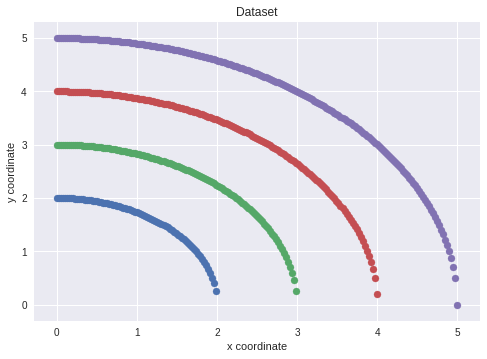

In [135]:
#Let's generate some points on the 1/4 th of the perimeter of a circle
radius=[2,3,4,5]
y=np.zeros([len(radius),200])
domain=np.linspace(0,5,200)
k=0
Y=[]
for r in radius:
  j=0
  for i in domain:  
    z=np.sqrt(r**2-i**2)
    y[k,j]=z
    j=j+1
  k=k+1
  
for i in range(0,k):
  plt.scatter(domain, y[i,:])    
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.title('Dataset')

In [0]:
def Neighborhood(x,y,X,Y,min_pts):#X includes all the points but x is just one sample
  sh1=X.shape
  l_x=sh1[1]##this shows 800 in this example
  cluster_x=[]
  for i in range (0,l_x):
        x1=np.absolute(x-X[0,i])
        y1=np.absolute(y-Y[0,i])
        if (x1 <= min_pts and y1 <= min_pts):
          cluster_x.append(i)#indices of the neighbors
          cluster_y.append(i)       
  return (cluster_x , cluster_y)        

In [0]:
###Testing the Neighbourhood function
#x=1
#y=1
#X=np.array([1.5,2.5,3,0.5])
#Y=np.array([1,2.5,1.5,0.5])
#X=X.reshape(1,len(X))
#Y=Y.reshape(1,len(Y))
#min_pts=0.7
#sh1=X.shape
#l_x=sh1[1]##this shows 800 in this example
#cluster_x=[]
#cluster_y=[]
#for i in range (0,l_x):
        #x1=np.absolute(x-X[0,i])
        #y1=np.absolute(y-Y[0,i])
        #print("index:",i,x1)
        #print("index:",i,y1)
        #if (x1 <= min_pts and y1 <= min_pts):
          #cluster_x.append(i)#indices of the neighbors
          #cluster_y.append(i) 
#print(cluster_x, cluster_y)          

     

In [0]:
min_pts=0.3#the radius to find the neighbourhood of the points

#Let's re-write the "x" values such that they are detremined according to the "y" values

X=np.array([domain,domain,domain,domain])
X=np.reshape(X, (1,4*200))#X and Y would be a one-dimensional array, they include the coordinates of all points
Y=np.reshape(y, (1,4*200))

sh1=X.shape
l_x=sh1[1]
sh2=Y.shape
l_y=sh2[1]
Labels=np.zeros(4*200)##Save the cluster labels here
Labels[0]=1##the first point we start with should belong to cluster number 1
K=1##Cluster count

        


In [138]:
for i in range (0,l_x):
    [x2,y2]=Neighborhood(X[0,i],Y[0,i],X,Y,min_pts)
    if i==0:#The cluster label of the first point is chosen as 1
      Labels[x2]=1
      print("first point assigned to group 1")
    else:
      
      if Labels[i] !=0:
          Labels[x2]=Labels[i]
          print("already assigned to a group\t","Number of neighbors:",len(x2),"index:",i, "cluster is:",Labels[i])
      else:
          if len(x2) !=0:##If it is not an outlier
              K=K+1
              Labels[i]=K
              Labels[x2]=K
              print("New point, not an outlier","Number of neighbors:",len(x2), "index:",i, "cluster is:",Labels[i])
          else:#This means that the point is an outlier with no neighboring points so we can call the class with a big number 1000
              Labels[i]=1000
              print("New point, outlier","Number of neighbors:",len(x2), "index:",i, "cluster is:",Labels[i])
#print(labels[i]) ###inja ro dorost kon           


first point assigned to group 1
already assigned to a group	 Number of neighbors: 13 index: 1 cluster is: 1.0
already assigned to a group	 Number of neighbors: 14 index: 2 cluster is: 1.0
already assigned to a group	 Number of neighbors: 15 index: 3 cluster is: 1.0
already assigned to a group	 Number of neighbors: 16 index: 4 cluster is: 1.0
already assigned to a group	 Number of neighbors: 17 index: 5 cluster is: 1.0
already assigned to a group	 Number of neighbors: 18 index: 6 cluster is: 1.0
already assigned to a group	 Number of neighbors: 19 index: 7 cluster is: 1.0
already assigned to a group	 Number of neighbors: 20 index: 8 cluster is: 1.0
already assigned to a group	 Number of neighbors: 21 index: 9 cluster is: 1.0
already assigned to a group	 Number of neighbors: 22 index: 10 cluster is: 1.0
already assigned to a group	 Number of neighbors: 23 index: 11 cluster is: 1.0
already assigned to a group	 Number of neighbors: 23 index: 12 cluster is: 1.0
already assigned to a group	 

In [0]:
[x2,y2]=Neighborhood(X[0,2],Y[0,2],X,Y,min_pts)


In [140]:
print(Labels)

[   1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
    1.    1.    1.    1.    1.    1.    1.    1. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 10